In [1]:
import numpy as np
import pandas as pd
import statistics 
import seaborn as sns

In [3]:
diabetes=pd.read_csv(r'C:\Users\archi\Downloads\diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#changing DataFrame into array
diabetes_array=np.array(diabetes)

In [6]:
diabetes_array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

# SkinThickness and Insulin can not be zero, therefore replacing with mean

In [7]:
asd1=diabetes['SkinThickness'].mean()
asd2=diabetes['Insulin'].mean()

In [8]:
for i in range(len(diabetes_array)):
    if diabetes_array[i][3]==0:
        diabetes_array[i][3]=asd1
    if diabetes_array[i][4]==0:
        diabetes_array[i][4]=asd2

# Finding Importance of each weight

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

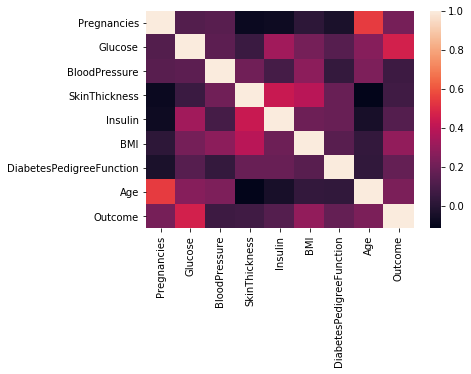

In [9]:
corr = diabetes.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

# Normalization of data

In [10]:
Column2_min=min(diabetes_array[:,1])
Column2_max=max(diabetes_array[:,1])
Column3_min=min(diabetes_array[:,2])
Column3_max=max(diabetes_array[:,2])
Column4_min=min(diabetes_array[:,3])
Column4_max=max(diabetes_array[:,3])
Column5_min=min(diabetes_array[:,4])
Column5_max=max(diabetes_array[:,4])
Column6_min=min(diabetes_array[:,5])
Column6_max=max(diabetes_array[:,5])
Column7_min=min(diabetes_array[:,6])
Column7_max=max(diabetes_array[:,6])
Column8_min=min(diabetes_array[:,7])
Column8_max=max(diabetes_array[:,7])
    
for i in range(len(diabetes_array)):
    diabetes_array[i,1]=(diabetes_array[i,1]-Column2_min)/(Column2_max-Column2_min)
    diabetes_array[i,2]=(diabetes_array[i,2]-Column3_min)/(Column3_max-Column3_min)
    diabetes_array[i,3]=(diabetes_array[i,3]-Column4_min)/(Column4_max-Column4_min)
    diabetes_array[i,4]=(diabetes_array[i,4]-Column5_min)/(Column5_max-Column5_min)
    diabetes_array[i,5]=(diabetes_array[i,5]-Column6_min)/(Column6_max-Column6_min)
    diabetes_array[i,6]=(diabetes_array[i,6]-Column7_min)/(Column7_max-Column7_min)
    diabetes_array[i,7]=(diabetes_array[i,7]-Column8_min)/(Column8_max-Column8_min)
    

# Now come training part

In [11]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
corr_array=np.array(corr)

In [13]:
corr_array[-1]

array([0.22189815, 0.4665814 , 0.06506836, 0.07475223, 0.13054795,
       0.29269466, 0.17384407, 0.23835598, 1.        ])

In [14]:
y_train=diabetes_array[:700,8]
X_test=diabetes_array[700:,:8]

# Not taking Pregnancy as feature as suggested by Doctors

In [48]:
def knn(x_test,y_train,diabetes_array,cor,p,k):
    t=[]
    pq=[]
    y_trn=list(y_train)
    for i in range(700):
        y1=abs(x_test[1]-diabetes_array[i,1])*cor[1]
        y2=abs(x_test[2]-diabetes_array[i,2])*cor[2]
        y3=abs(x_test[3]-diabetes_array[i,3])*cor[3]
        y4=abs(x_test[4]-diabetes_array[i,4])*cor[4]
        y5=abs(x_test[5]-diabetes_array[i,5])*cor[5]
        y6=abs(x_test[6]-diabetes_array[i,6])*cor[6]
        y7=abs(x_test[7]-diabetes_array[i,7])*cor[7]
        sum_of_dist=((y1**p)+(y2**p)+(y3**p)+(y4**p)+(y5**p)+(y6**p)+(y7**p))**(1/p)
        #sum_of_dist=((y1)+(y2)+(y3)+(y4)+(y5)+(y6)+(y7))
        t.append(sum_of_dist)
    
    for i in range(k):
        minimum=min(t)
        min_index=t.index(minimum)
        pq.append(y_trn[min_index])
        t.pop(min_index)
        y_trn.pop(min_index)
      
    yes_diabetes=pq.count(1)
    no_diabetes=pq.count(0)
    if yes_diabetes >= no_diabetes:
        return 1
    else:
        return 0

# Trained on 700 sample and tested on last 68 sample.

In [116]:
ans=[]
for j in range(68):
    ans.append(knn(X_test[j],y_train,diabetes_array,corr_array[-1],1,13))

In [117]:
accurate=0
for f in range(len(ans)):
    if ans[f]==diabetes_array[700+f,8]:
        accurate+=1
accuracy=accurate/len(ans)
accuracy

0.8235294117647058

In [118]:
actual=[]
for f in range(len(ans)):
    actual.append(diabetes_array[700+f,8])

In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
results = confusion_matrix(actual, ans) 
print(results) 

[[37  4]
 [ 8 19]]


# USING SKLEARN LIBRARY

In [127]:
X=diabetes_array[:700,:8]
y=y_train=diabetes_array[:700,8]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=13,  weights='uniform',p=1)
neigh.fit(X, y)

anss=[]
for j in range(68):
    anss.append(neigh.predict([X_test[j]]))
accurate=0
for f in range(len(ans)):
    if anss[f]==diabetes_array[700+f,8]:
        accurate+=1
accuracy=accurate/len(anss)
print(accuracy)

0.7352941176470589


In [128]:
results = confusion_matrix(actual, anss) 
print(results) 

[[37  4]
 [14 13]]
